## Comparing Metric #1 (off-ice error) and #2 (Sobel flow statistics)

### Analysis

#### 1. Basic information, importing modules

- Test area: **Kaskawulsh Glacier**
- Test packages: **CARST, Vmap, GIV, autoRIFT**
- Test pair: **Landsat 8 20180304-20180405**

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
# import gftt
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

#### 2. Load the feature tracking data list and the metrics for each test

Each row is a feature tracking test using a specific parameter combination described in each field.

In [3]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df['OIE-x'] = df['OIE-x'].astype(float)
df['OIE-y'] = df['OIE-y'].astype(float)
df['slope_max-normal-E'] = df['slope_max-normal-E'].astype(float)
df['slope_min-shear-E'] = df['slope_min-shear-E'].astype(float)
df['E_ratio'] = df['E_ratio'].astype(float)
df['OIE'] = (df['OIE-x'] * df['OIE-y']) ** 0.5
df['pt0_velodiff'] = df['pt0_velodiff'].astype(float)
df['pt1_velodiff'] = df['pt1_velodiff'].astype(float)
df['pt2_velodiff'] = df['pt2_velodiff'].astype(float)
for idx, row in df.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter, row.Subpixel[:10]))
    df.loc[idx, 'label'] = label
df

,Date,Chip (px),Resolution (px),Prefilter,Subpixel,Software,Vx,Vy,OIE-x,OIE-y,OI-peak-x,OI-peak-y,slope_max-normal-E,slope_min-shear-E,E_ratio,pt0_velodiff,pt1_velodiff,pt2_velodiff,OIE,label
0,Sen2-20180304-20180314,48,12,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.523438,0.546875,-0.0703125,0.1953125,0.071212,0.147663,0.482265,0.070795,-0.024049,0.933118,0.535028,CARST-48-12-Gau-16-node ov
1,Sen2-20180304-20180314,48,12,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.421875,0.429688,-0.0625,0.1640625,0.057826,0.101876,0.567611,-0.079942,-0.001844,NaN,0.425763,CARST-48-12-NAOF-16-node ov
2,Sen2-20180304-20180314,48,12,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.824219,0.925781,-0.0416666679084301,0.1354166716337204,0.080115,0.158693,0.504841,-0.213450,-0.181267,4.574336,0.873525,CARST-48-12-None-16-node ov
3,Sen2-20180304-20180314,48,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.593750,0.578125,-0.0625,0.1875,0.062518,0.120220,0.520035,-0.000617,-0.033971,0.922879,0.585885,CARST-48-1-Gau-16-node ov
4,Sen2-20180304-20180314,48,1,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.406250,0.468750,-0.0625,0.15625,0.035411,0.073263,0.483342,-0.126817,-0.004175,7.474734,0.436383,CARST-48-1-NAOF-16-node ov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Sen2-20180508-20180627,64,8,Gau,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.340625,0.537500,0.05000000074505806,-0.05000000074505806,0.157609,0.332714,0.473707,-0.005820,NaN,NaN,0.427885,autoRIFT-64-8-Gau-pyrUP
168,Sen2-20180508-20180627,32,4,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.250000,0.331250,0.03750000149011612,-0.012500000186264515,0.187083,0.390503,0.479083,-0.048853,NaN,NaN,0.287772,autoRIFT-32-4-NAOF-pyrUP
169,Sen2-20180508-20180627,32,8,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.162500,0.246875,0.03750000149011612,-0.02500000037252903,0.687276,1.228652,0.559374,-0.046996,NaN,NaN,0.200293,autoRIFT-32-8-NAOF-pyrUP
170,Sen2-20180508-20180627,64,4,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,0.175000,0.256250,0.03750000149011612,-0.012500000186264515,0.176882,0.374439,0.472391,-0.074091,NaN,NaN,0.211763,autoRIFT-64-4-NAOF-pyrUP


In [18]:
datestrs = ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']
demo = df.loc[df['Date'] == datestrs[3]]
# demo

#### 3. Sobel flow statistics VS Off-ice error

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

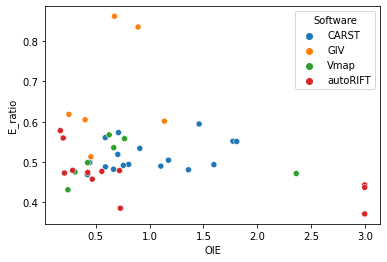

In [19]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Software')

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

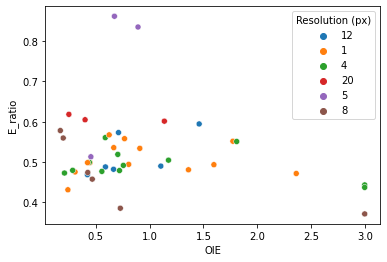

In [20]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Resolution (px)')

<AxesSubplot:xlabel='OIE', ylabel='E_ratio'>

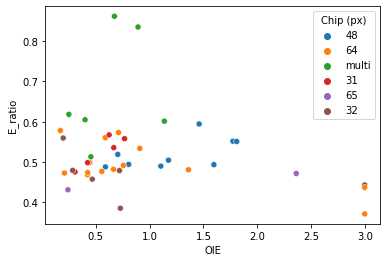

In [21]:
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Chip (px)')

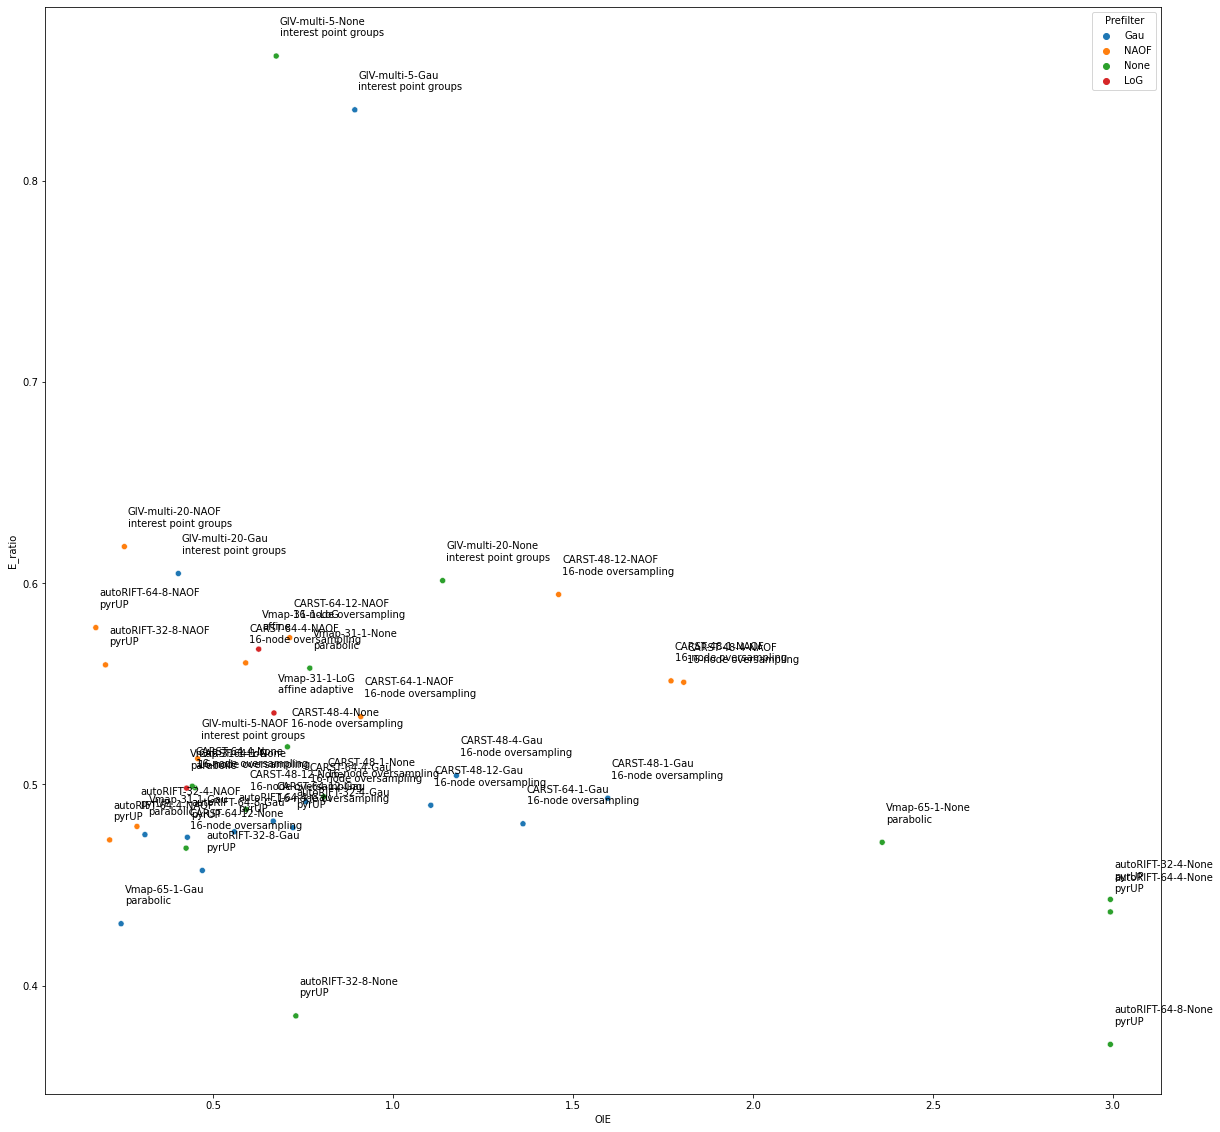

In [22]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['E_ratio'] + 0.01, label)


#### 4. AGU 2021 poster, Figure 3

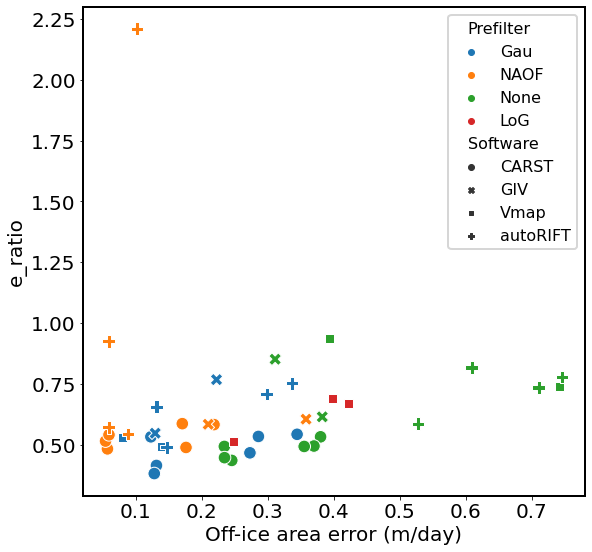

In [26]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
# ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

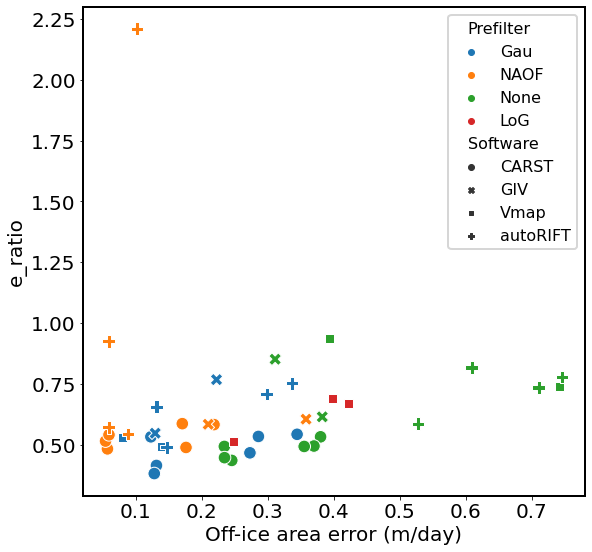

In [25]:
demo = df.loc[df['Date'] == datestrs[1]]
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
# ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

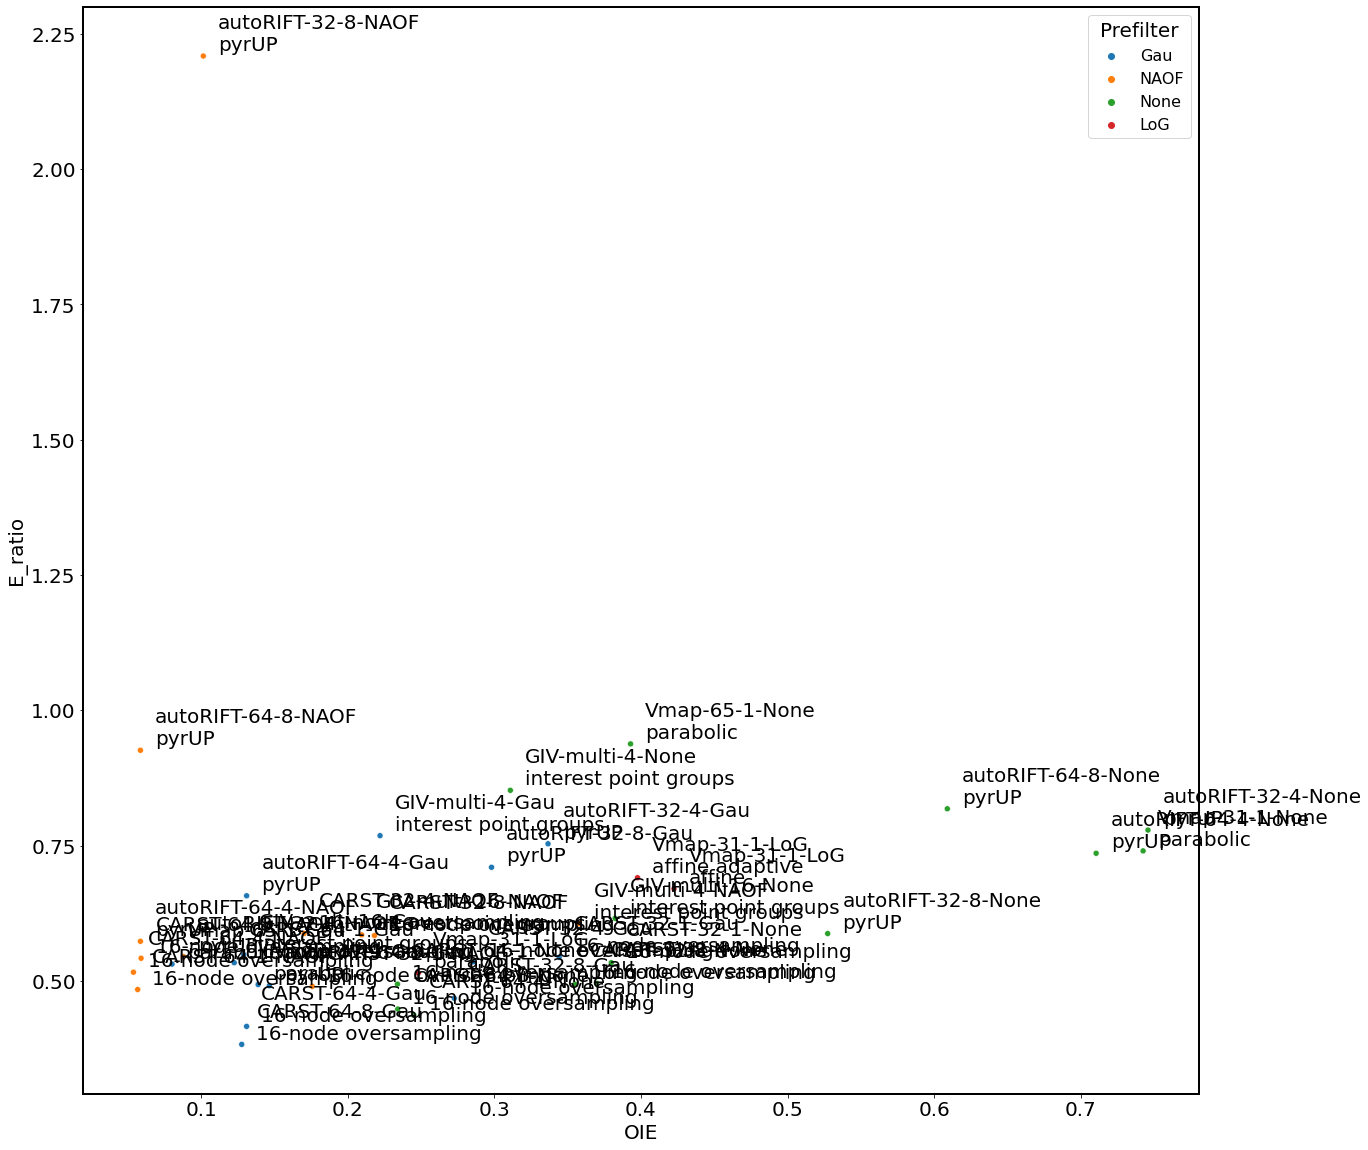

In [27]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['E_ratio'] + 0.01, label)


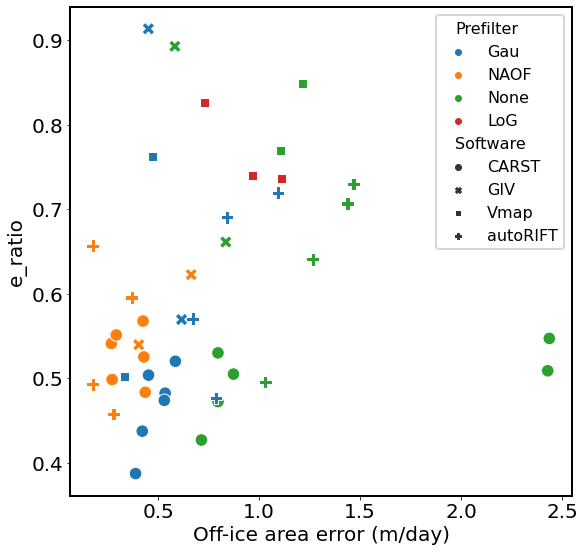

In [29]:
demo = df.loc[df['Date'] == datestrs[2]]
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
# ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')

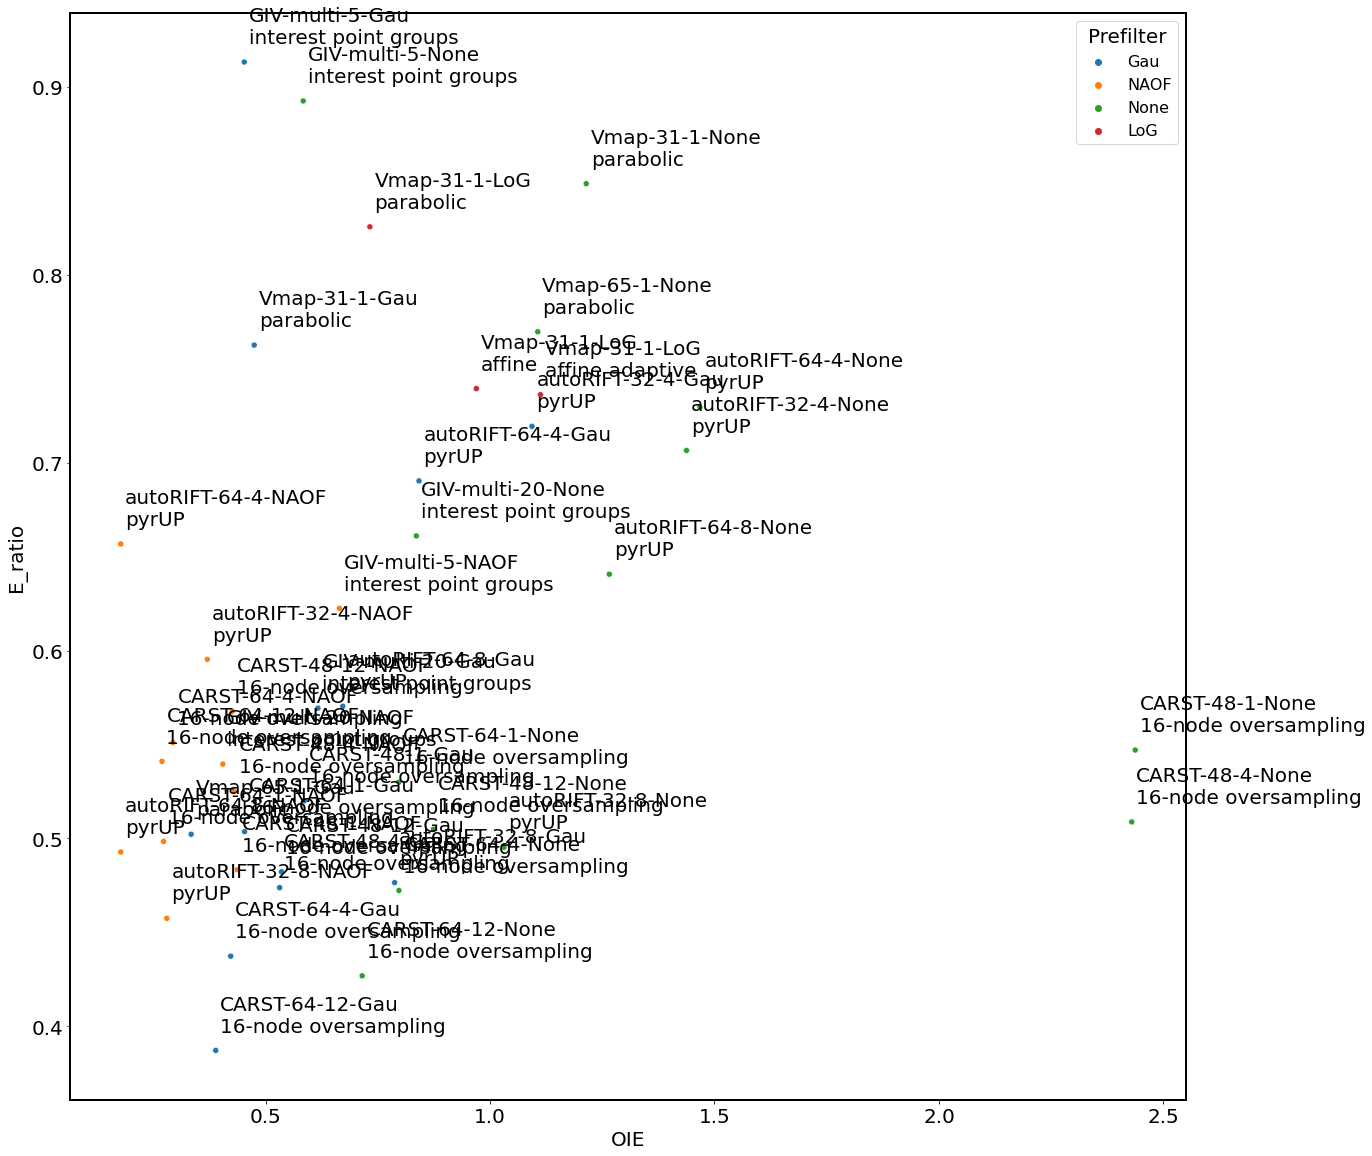

In [30]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['E_ratio'] + 0.01, label)

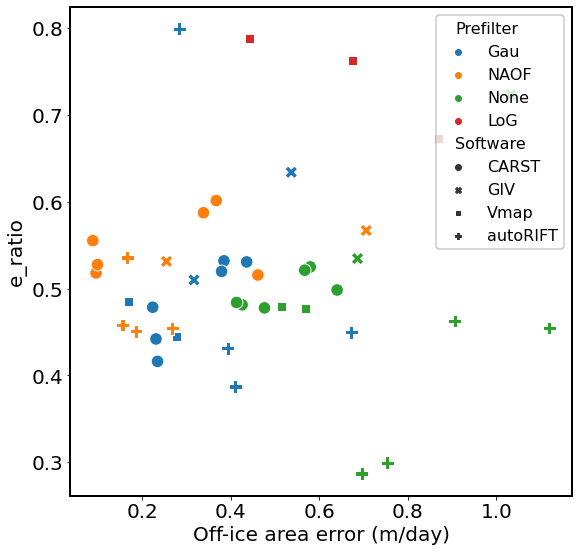

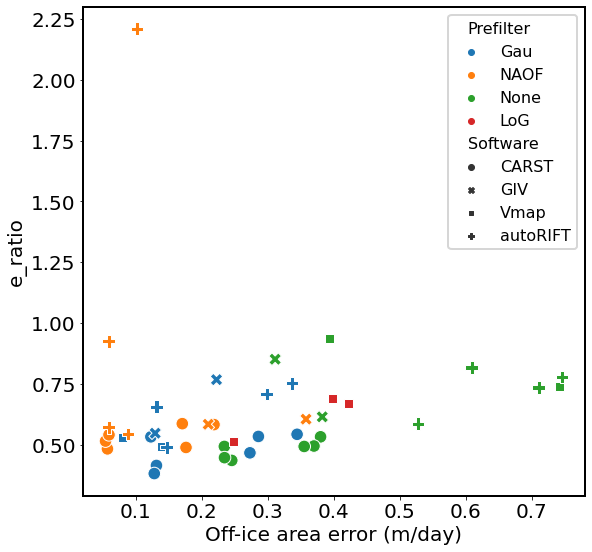

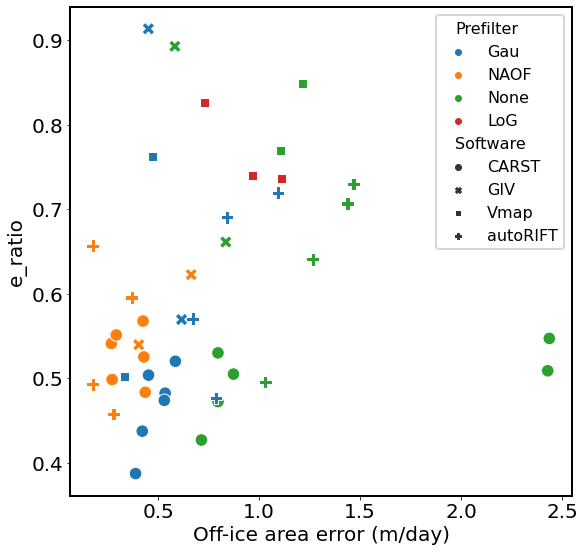

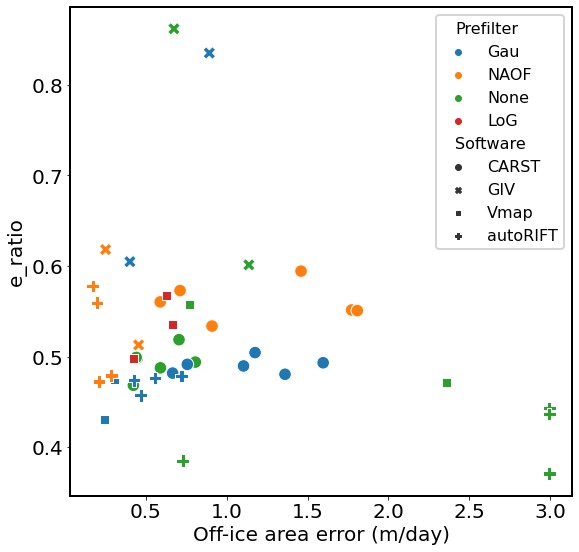

In [32]:
for i in range(4):
    demo = df.loc[df['Date'] == datestrs[i]]
    fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
    sns.scatterplot(data=demo, x='OIE', y='E_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
    ax6.set_xlabel('Off-ice area error (m/day)')
    ax6.set_ylabel('e_ratio')
    # ax6.set_xlim(0, 1.2)
    legend = ax6.get_legend()
    # legend.set_size(10)
    legend.get_frame().set_linewidth(2)
    fig.patch.set_facecolor('xkcd:white')
    # fig.savefig('OIE-vs-SS_updated.svg')

In [12]:
# demo = df
demo = df.loc[df['Date'] == datestrs[3]]
pt = 'pt0_velodiff'

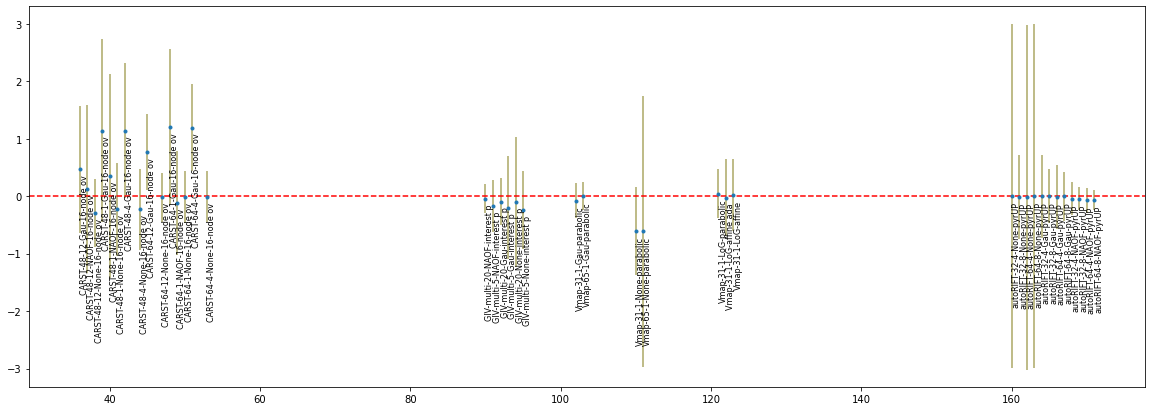

In [13]:
fig, ax7 = plt.subplots(1, 1, figsize=(20, 7))
plt.errorbar(demo.index, demo[pt], fmt='.', yerr=demo['OIE'], ecolor='xkcd:khaki')
plt.axhline(y=0, color='r', linestyle='--')
for idx, row in demo.iterrows():
    plt.annotate(row['label'], xy=(idx, row[pt]), xytext=(0, -5), rotation=90, textcoords='offset points', size=8, va='top')
# ax0.annotate('BlaBlaBla2', xy=('2017-07-02 16:30:00', ymax), xytext=(10, 25), textcoords='offset points',
#              rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)
# row['label']

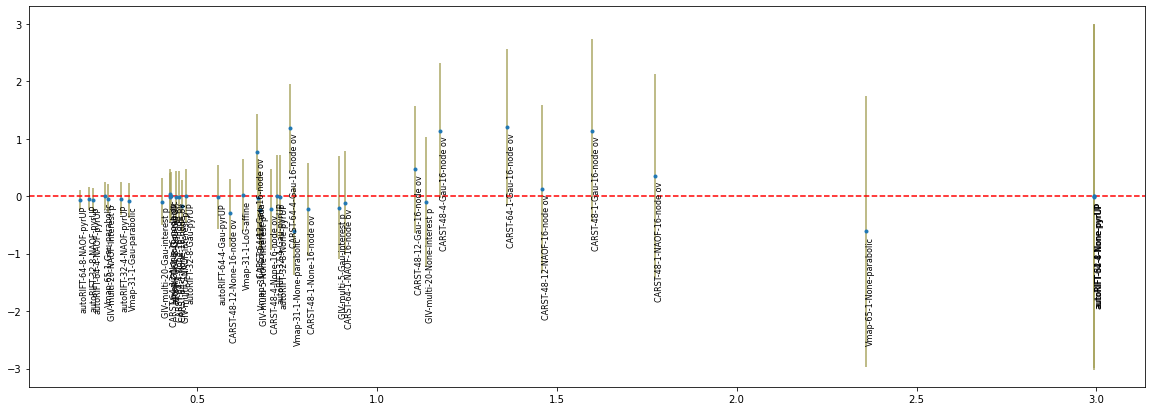

In [14]:
fig, ax7 = plt.subplots(1, 1, figsize=(20, 7))
plt.errorbar(demo['OIE'], demo[pt], fmt='.', yerr=demo['OIE'], ecolor='xkcd:khaki')
plt.axhline(y=0, color='r', linestyle='--')
for idx, row in demo.iterrows():
    plt.annotate(row['label'], xy=(row['OIE'], row[pt]), xytext=(0, -5), rotation=90, textcoords='offset points', size=8, va='top')

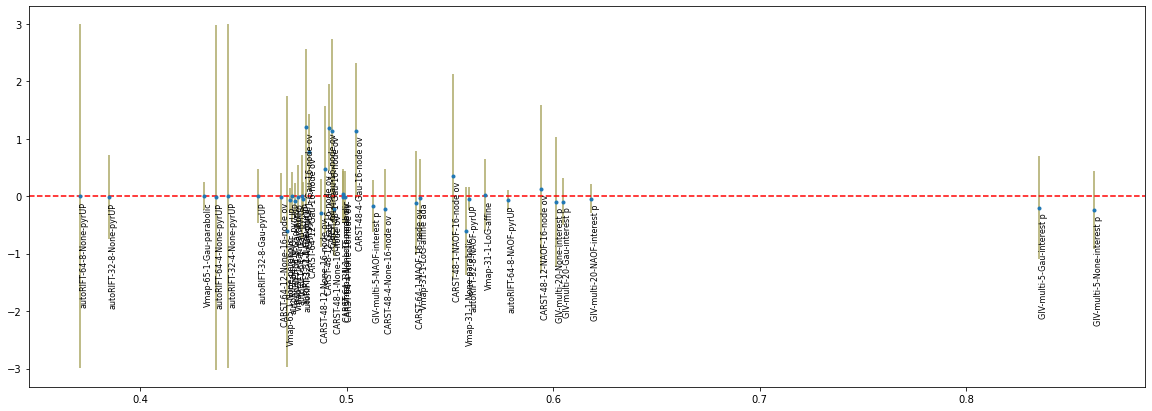

In [15]:
fig, ax7 = plt.subplots(1, 1, figsize=(20, 7))
plt.errorbar(demo['E_ratio'], demo[pt], fmt='.', yerr=demo['OIE'], ecolor='xkcd:khaki')
plt.axhline(y=0, color='r', linestyle='--')
for idx, row in demo.iterrows():
    plt.annotate(row['label'], xy=(row['E_ratio'], row[pt]), xytext=(0, -5), rotation=90, textcoords='offset points', size=8, va='top')

In [16]:
# demo = df.loc[df['Date'] == datestrs[0]]

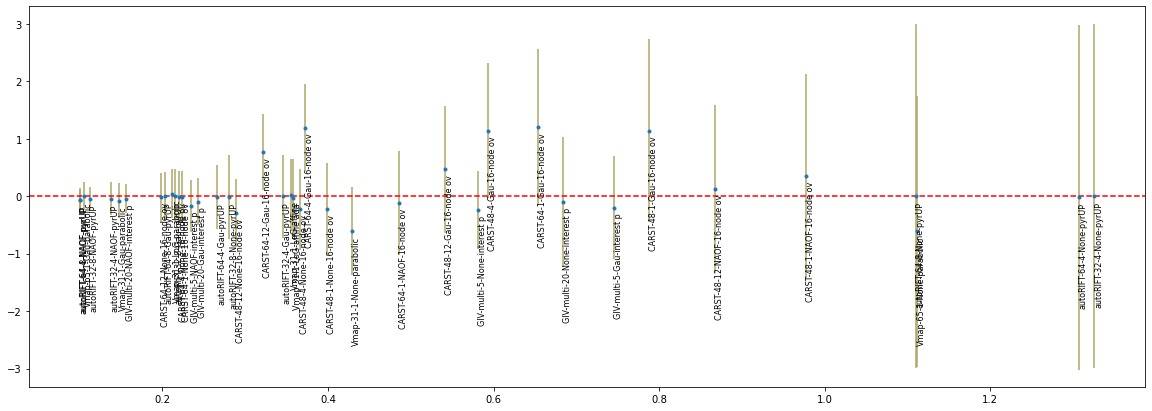

In [17]:
fig, ax7 = plt.subplots(1, 1, figsize=(20, 7))
plt.errorbar(demo['E_ratio'] * demo['OIE'], demo[pt], fmt='.', yerr=demo['OIE'], ecolor='xkcd:khaki')
plt.axhline(y=0, color='r', linestyle='--')
for idx, row in demo.iterrows():
    plt.annotate(row['label'], xy=(row['E_ratio'] * row['OIE'], row[pt]), xytext=(0, -5), rotation=90, textcoords='offset points', size=8, va='top')